In [4]:
import glob

In [5]:
path = '../../datasets/flower_data/flower_photos/daisy'

files = sorted(glob.glob('%s/*.*' % path))

print(files)

['../../datasets/flower_data/flower_photos/daisy\\100080576_f52e8ee070_n.jpg', '../../datasets/flower_data/flower_photos/daisy\\10140303196_b88d3d6cec.jpg', '../../datasets/flower_data/flower_photos/daisy\\10172379554_b296050f82_n.jpg', '../../datasets/flower_data/flower_photos/daisy\\10172567486_2748826a8b.jpg', '../../datasets/flower_data/flower_photos/daisy\\10172636503_21bededa75_n.jpg', '../../datasets/flower_data/flower_photos/daisy\\102841525_bd6628ae3c.jpg', '../../datasets/flower_data/flower_photos/daisy\\1031799732_e7f4008c03.jpg', '../../datasets/flower_data/flower_photos/daisy\\10391248763_1d16681106_n.jpg', '../../datasets/flower_data/flower_photos/daisy\\10437754174_22ec990b77_m.jpg', '../../datasets/flower_data/flower_photos/daisy\\10437770546_8bb6f7bdd3_m.jpg', '../../datasets/flower_data/flower_photos/daisy\\10437929963_bc13eebe0c.jpg', '../../datasets/flower_data/flower_photos/daisy\\10466290366_cc72e33532.jpg', '../../datasets/flower_data/flower_photos/daisy\\1046655

In [6]:
files[1 % len(files)]


'../../datasets/flower_data/flower_photos/daisy\\10140303196_b88d3d6cec.jpg'

In [7]:
import torchvision.transforms as transforms
from PIL import Image

In [8]:
transforms_ = transforms.Compose([
    transforms.Resize((128, 128), Image.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    transforms.ToPILImage(),
])
transforms_lr = transforms.Compose([
    transforms.Resize((128 // 4, 128 // 4), Image.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    transforms.ToPILImage(),
])

D:\anaconda3\envs\torch_1\lib\site-packages\torchvision\transforms\transforms.py:257: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


In [9]:
img = Image.open(files[0 % len(files)])

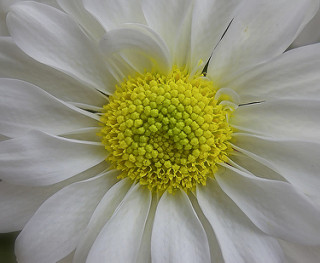

In [10]:
img

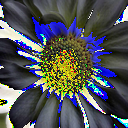

In [11]:
img_conv = transforms_(img)
img_conv

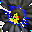

In [12]:
img_conv2 = transforms_lr(img)
img_conv2

In [13]:
transforms_norm1 = transforms.Compose([
    transforms.Resize((128, 128), Image.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize((0.8, 0.8, 0.8), (0.8, 0.8, 0.8)),
    transforms.ToPILImage(),
])
transforms_norm2 = transforms.Compose([
    transforms.Resize((128, 128), Image.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize((0.1, 0.1, 0.1), (0.1, 0.1, 0.1)),
    transforms.ToPILImage(),
])

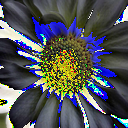

In [14]:
img_conv = transforms_(img)
img_conv

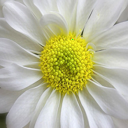

In [15]:
img_conv3 = transforms_norm1(img)
img_conv3

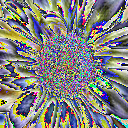

In [16]:
img_conv4 = transforms_norm2(img)
img_conv4

In [17]:
import numpy as np

In [37]:
def apply_random_mask(imgs):
    idx = np.random.randint(0, 128 - 32, (imgs.shape[0], 2))

    masked_imgs = imgs.clone()
    for i, (y1, x1) in enumerate(idx):
        y2, x2 = y1 + 32, x1 + 32
        masked_imgs[:, y1:y2, x1:x2] = -1

    return masked_imgs

In [52]:
transforms_mask = transforms.Compose([
    transforms.Resize((128, 128), Image.BICUBIC),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

In [53]:
img_mask = transforms_mask(img)

In [54]:
img_mask

tensor([[[ 0.0745,  0.1294,  0.1608,  ...,  0.2000,  0.2078,  0.1922],
         [ 0.0667,  0.1294,  0.1608,  ...,  0.2078,  0.2000,  0.1765],
         [ 0.0588,  0.1137,  0.1451,  ...,  0.2235,  0.1922,  0.1529],
         ...,
         [-0.6549, -0.6549, -0.6549,  ...,  0.0118,  0.0039,  0.0196],
         [-0.6549, -0.6549, -0.6471,  ...,  0.0275,  0.0196,  0.0196],
         [-0.6549, -0.6549, -0.6471,  ...,  0.0431,  0.0275,  0.0275]],

        [[ 0.0745,  0.1373,  0.1686,  ...,  0.2000,  0.2078,  0.1922],
         [ 0.0667,  0.1216,  0.1529,  ...,  0.2078,  0.2000,  0.1765],
         [ 0.0510,  0.1059,  0.1294,  ...,  0.2235,  0.1922,  0.1529],
         ...,
         [-0.6392, -0.6392, -0.6392,  ..., -0.0196, -0.0275, -0.0118],
         [-0.6314, -0.6314, -0.6235,  ..., -0.0039, -0.0118, -0.0118],
         [-0.6314, -0.6314, -0.6235,  ...,  0.0118, -0.0039, -0.0039]],

        [[ 0.0588,  0.1373,  0.1686,  ...,  0.1843,  0.2000,  0.2000],
         [ 0.0510,  0.1216,  0.1608,  ...,  0

In [55]:
mask_img = apply_random_mask(img_mask)

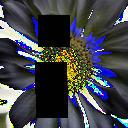

In [56]:
toPIL = transforms.ToPILImage()
pic = toPIL(mask_img)
pic

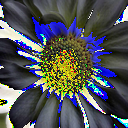

In [57]:
img_conv